# Covid-19 Analysis in India
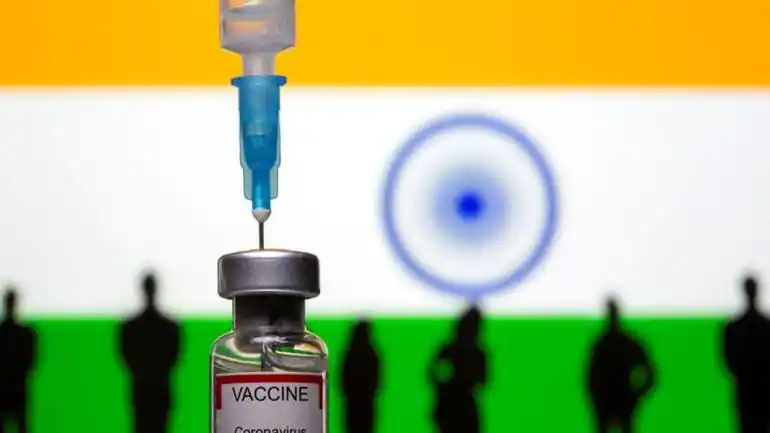


# Data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving covid_19_india.csv to covid_19_india.csv
Saving covid_vaccine_statewise.csv to covid_vaccine_statewise.csv
Saving StatewiseTestingDetails.csv to StatewiseTestingDetails.csv


In [3]:
dfn=pd.read_csv("covid_19_india.csv")
dfn.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


In [4]:
st_df= pd.read_csv("StatewiseTestingDetails.csv")
st_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [5]:
vc_df=pd.read_csv('covid_vaccine_statewise.csv')
vc_df.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [6]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16850 non-null  int64 
 1   Date                      16850 non-null  object
 2   Time                      16850 non-null  object
 3   State/UnionTerritory      16850 non-null  object
 4   ConfirmedIndianNational   16850 non-null  object
 5   ConfirmedForeignNational  16850 non-null  object
 6   Cured                     16850 non-null  int64 
 7   Deaths                    16850 non-null  int64 
 8   Confirmed                 16850 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [7]:
dfn.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
df=dfn.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [9]:
df['active']=df['Confirmed']-(df['Deaths']+df['Cured'])

In [10]:
df.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active
0,1,2020-01-30,Kerala,0,0,1,1
1,2,2020-01-31,Kerala,0,0,1,1
2,3,2020-02-01,Kerala,0,0,2,2
3,4,2020-02-02,Kerala,0,0,3,3
4,5,2020-02-03,Kerala,0,0,3,3


In [11]:
statewise = pd.pivot_table(df, values= ['Confirmed','Deaths','Cured'],index='State/UnionTerritory',aggfunc='max')
statewise['Recovery rate']= statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality rate'] = statewise['Deaths']*100/ statewise['Confirmed']
statewise= statewise.sort_values(by='Confirmed', ascending= False)
statewise.style.background_gradient(cmap= 'YlOrBr')

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Maharashtra,6113335,5872268,123531,96.056702,2.020681
Kerala,2996094,2877557,13960,96.043615,0.465940
Karnataka,2859595,2784030,35526,97.357493,1.242344
Tamil Nadu,2503481,2435872,33132,97.299400,1.323437
Andhra Pradesh,1908065,1861937,12898,97.582472,0.675973
Uttar Pradesh,1706818,1682130,22656,98.553566,1.327382
West Bengal,1507241,1472132,17834,97.670645,1.183222
Delhi,1434687,1408853,25001,98.199328,1.742610
Chhattisgarh,996359,977893,13462,98.146652,1.351119


Maharastra at the top in number of cases                            
Seeing the number of cases Rajasthan doing pretty well in recovery rate.                       
Kerala and AP shows low mortality rate                        

In [12]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15113 non-null  object 
 1   State         15113 non-null  object 
 2   TotalSamples  15113 non-null  float64
 3   Negative      6657 non-null   object 
 4   Positive      5589 non-null   float64
dtypes: float64(2), object(3)
memory usage: 590.5+ KB


In [13]:
st_df.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        8456
Positive        9524
dtype: int64

In [14]:
st_df['Negative']=st_df['Negative'].fillna(0)
st_df['TotalSamples']=st_df['TotalSamples'].astype('int')
st_df['Positive']=st_df['Positive'].fillna(0)
st_df['Positive']=st_df['Positive'].astype('int')

In [15]:
StatewiseTesting = pd.pivot_table(st_df, values=['TotalSamples','Positive'],index='State',aggfunc='max')
StatewiseTesting['positive case rate ']= StatewiseTesting['Positive']*100/ StatewiseTesting['TotalSamples']
StatewiseTesting= StatewiseTesting.sort_values(by='TotalSamples', ascending= False)
StatewiseTesting.style.background_gradient(cmap = 'YlOrBr')

,Positive,TotalSamples,positive case rate
State,,,
Uttar Pradesh,126722,59331655,0.213582
Maharashtra,1638961,42908288,3.819684
Karnataka,264546,35152131,0.752575
Bihar,90553,33875754,0.267309
Tamil Nadu,367430,33789460,1.087410
Gujarat,136004,24033168,0.565901
Kerala,932639,23768112,3.923909
Andhra Pradesh,235525,22524187,1.045654
Delhi,151928,21916160,0.693224


Tripura has highest positive rate of COVID followed by Dadra and Nagar (although population is so less ) , Kerala , Maharastra then Jharkhand.

# Visualization

In [16]:
totaltested =StatewiseTesting['TotalSamples'].sum()
totalpositive = StatewiseTesting['Positive'].sum()
fig = go.Figure(data=[go.Pie(labels=['Total Samples Tested','Positive Cases from tested samples'],
                            values= [totaltested,totalpositive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='COVID19 Test Results from ICMR in india from 2020-01-30 - 2021-07-07	',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [17]:
at = df['active'].sum()
death = df['Deaths'].sum()
cr= df['Cured'].sum()
fig = go.Figure(data=[go.Pie(labels=['Active','Cured','Death'],
                             values= [at,cr,death],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='Sum total COVID Situation in INDIA from 2020-01-30 - 2021-07-07',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [18]:
testing = st_df.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing,
             x='TotalSamples',
             y='State',
             orientation='h',
             height=900,
             title= 'Total sample Statewise',
             color='State', text='TotalSamples',)
fig.show()

In [24]:
plt.figure(figsize = (16,14))
figure = px.line(dfn, x='Date', y='Confirmed', color='State/UnionTerritory')
figure.update_xaxes(rangeslider_visible=True)
pyo.iplot(figure)

<Figure size 1152x1008 with 0 Axes>

In [62]:
df1=dfn.groupby('Date')[['Cured','Deaths','Confirmed']].sum()
df1.tail()

,Cured,Deaths,Confirmed
Date,,,
2021-07-03,29605779,401050,30502362
2021-07-04,29658078,402005,30545433
2021-07-05,29700430,402728,30585229
2021-07-06,29752294,403281,30619932
2021-07-07,29799534,404211,30663665


In [63]:
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Cured"]/df1["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df1.index, y=(df1["Deaths"]/df1["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100

Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100

Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

In [65]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df1.index, y=df1["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Cured"],
                    mode='lines+markers',
                    name='Cured Cases'))
fig.add_trace(go.Scatter(x=df1.index, y=df1["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Curve to show cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Number of cases are getting high as time passes it's bad sign 
although people are getting cured too, with good rate.

In [ ]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397]    
}
statewise["Lat"] = ""
statewise["Long"] = ""

for index in statewise.index :
    if index in locations:
        statewise.loc[statewise.index == index,"Lat"] = locations[index][0]
        statewise.loc[statewise.index == index,"Long"] = locations[index][1]
    else:
        statewise.drop([index],inplace=True)

In [ ]:
import folium  
from IPython.display import HTML, display
india = folium.Map(location=[23,80], zoom_start=4,max_zoom=6,min_zoom=4,height=600,width="80%", tiles='cartodbpositron')
for i in range(0,len(statewise[statewise['Confirmed']>0].index)):
    folium.Circle(
        location=[statewise.iloc[i]['Lat'], statewise.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+statewise.iloc[i].name+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(statewise.iloc[i]['Confirmed'])+"</li>"+
        "<li>Cured:   "+str(statewise.iloc[i]['Cured'])+"</li>"+
        "<li>Deaths:   "+str(statewise.iloc[i]['Deaths'])+"</li>"+
        "<li>Recovery Rate:   "+str(np.round(statewise.iloc[i]['Recovery rate'],2))+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(statewise.iloc[i]['Mortality rate'],2))+"</li>"+
        "</ul>"
        ,
        radius=(int(np.log2(statewise.iloc[i]['Confirmed']+1)))*6000,
        color='red',
        fill_color='#ff8533',
        fill=True).add_to(india)

india

Here is the visuals on India Map 

In [71]:
df1.tail()

,index,Date,Cured,Deaths,Confirmed
520,520,2021-07-03,29605779,401050,30502362
521,521,2021-07-04,29658078,402005,30545433
522,522,2021-07-05,29700430,402728,30585229
523,523,2021-07-06,29752294,403281,30619932
524,524,2021-07-07,29799534,404211,30663665


In [69]:
growth_diff = []

for i in range(1,len(df1['Confirmed'])):
    growth_diff.append(df1['Confirmed'][i] / df1['Confirmed'][i-1])

growth_factor = sum(growth_diff)/len(growth_diff)
print('Average growth factor',growth_factor)

Average growth factor 1.0394159906583558


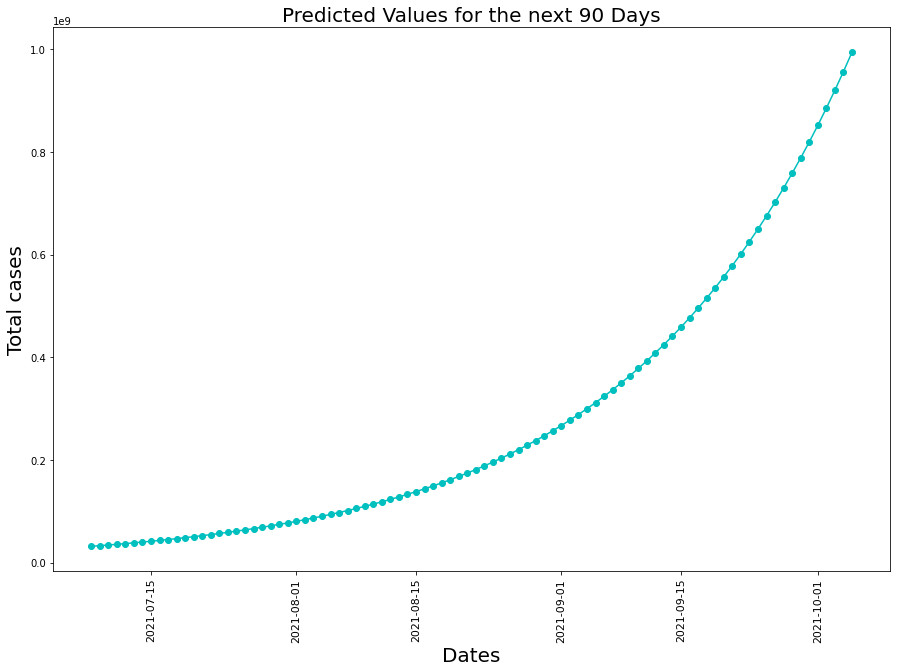

In [70]:
prediction_dates = []
df1.reset_index(inplace=True)
from datetime import datetime,timedelta
df1['Date']=pd.to_datetime(df1['Date'], format='%Y-%m-%d')
start_date = df1['Date'][len(df1['Date']) - 1]
for i in range(90):
    date = start_date +timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
previous_day_cases = df1['Confirmed'][len(df1['Date']) - 1]
predicted_cases = []

for i in range(90):
    predicted_value = previous_day_cases *  growth_factor
    predicted_cases.append(predicted_value)
    previous_day_cases = predicted_value

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Number of cases cases',fontsize = 20)
plt.title("Predicted Values for the next 90 Days" , fontsize = 20)
ax1 = plt.plot_date(y= predicted_cases,x= prediction_dates,linestyle ='-',color = 'c')

## Lockdown Effect

On 24 March 2020, PM Narendra Modi announced a complete nationwide lockdown                                             

No lockdown= 2020-01-30 to 2020-03-24                
lockdown 1= 2020-03-24 to 2020-07-15                    
Lockdown_2= 2020-07-15 to 2020-11-04              
Lockdown_3= 2020-11-04 to 2021-02-19                
Lockdown_4= 2021-02-19 to 2021-05-31                   
Unlock_1= 2020-06-01 to 2020-06-30                       
Unlock_2= 2020-07-01 to present                                       

In [89]:
No_Lockdown=df1[df1["Date"]<pd.to_datetime("2020-03-24")]
Lockdown_1=df1[(df1["Date"]>=pd.to_datetime("2020-03-24"))&(df1["Date"]<pd.to_datetime("2020-07-15"))]
Lockdown_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-15"))&(df1["Date"]<pd.to_datetime("2020-11-04"))]
Lockdown_3=df1[(df1["Date"]>=pd.to_datetime("2020-11-04"))&(df1["Date"]<pd.to_datetime("2021-02-19"))]
Lockdown_4=df1[(df1["Date"]>=pd.to_datetime("2021-02-19"))&(df1["Date"]<=pd.to_datetime("2021-05-31"))]
Unlock_1=df1[(df1["Date"]>=pd.to_datetime("2020-06-01"))&(df1["Date"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=df1[(df1["Date"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})

No_Lockdown_datewise["Active Cases"]=No_Lockdown_datewise["Confirmed"]-No_Lockdown_datewise["Cured"]-No_Lockdown_datewise["Deaths"]
Lockdown_1_datewise["Active Cases"]=Lockdown_1_datewise["Confirmed"]-Lockdown_1_datewise["Cured"]-Lockdown_1_datewise["Deaths"]
Lockdown_2_datewise["Active Cases"]=Lockdown_2_datewise["Confirmed"]-Lockdown_2_datewise["Cured"]-Lockdown_2_datewise["Deaths"]
Lockdown_3_datewise["Active Cases"]=Lockdown_3_datewise["Confirmed"]-Lockdown_3_datewise["Cured"]-Lockdown_3_datewise["Deaths"]
Lockdown_4_datewise["Active Cases"]=Lockdown_4_datewise["Confirmed"]-Lockdown_4_datewise["Cured"]-Lockdown_4_datewise["Deaths"]
Unlock_1_datewise["Active Cases"]=Unlock_1_datewise["Confirmed"]-Unlock_1_datewise["Cured"]-Unlock_1_datewise["Deaths"]
Unlock_2_datewise["Active Cases"]=Unlock_2_datewise["Confirmed"]-Unlock_2_datewise["Cured"]-Unlock_2_datewise["Deaths"]

No_Lockdown_datewise["Days Since"]=(No_Lockdown_datewise.index-No_Lockdown_datewise.index.min()).days
Lockdown_1_datewise["Days Since"]=(Lockdown_1_datewise.index-Lockdown_1_datewise.index.min()).days
Lockdown_2_datewise["Days Since"]=(Lockdown_2_datewise.index-Lockdown_2_datewise.index.min()).days
Lockdown_3_datewise["Days Since"]=(Lockdown_3_datewise.index-Lockdown_3_datewise.index.min()).days
Lockdown_4_datewise["Days Since"]=(Lockdown_4_datewise.index-Lockdown_4_datewise.index.min()).days
Unlock_1_datewise["Days Since"]=(Unlock_1_datewise.index-Unlock_1_datewise.index.min()).days
Unlock_2_datewise["Days Since"]=(Unlock_2_datewise.index-Unlock_2_datewise.index.min()).days

print("Average Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 1.0: ",(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 2.0: ",(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 3.0: ",(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Lockdown 4.0: ",(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()).median())
print("Average Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).mean())
print("Median Active Cases growth rate in Unlock 1.0: ",(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()).median())

Average Active Cases growth rate in Lockdown 1.0:  1.0611560639753137
Median Active Cases growth rate in Lockdown 1.0:  1.0426155427017767
Average Active Cases growth rate in Lockdown 2.0:  1.004941539304629
Median Active Cases growth rate in Lockdown 2.0:  1.0051421081236613
Average Active Cases growth rate in Lockdown 3.0:  0.9869638774273347
Median Active Cases growth rate in Lockdown 3.0:  0.9881672030831116
Average Active Cases growth rate in Lockdown 4.0:  1.0276951647800772
Median Active Cases growth rate in Lockdown 4.0:  1.0303569221473008
Average Active Cases growth rate in Unlock 1.0:  1.0292823925483092
Median Active Cases growth rate in Unlock 1.0:  1.0286948988535212


In [90]:
fig=go.Figure()
fig.add_trace(go.Scatter(y=list(Lockdown_1_datewise["Active Cases"]/Lockdown_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 1.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_2_datewise["Active Cases"]/Lockdown_2_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 2.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_3_datewise["Active Cases"]/Lockdown_3_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 3.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Lockdown_4_datewise["Active Cases"]/Lockdown_4_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Lockdown 4.0 Active Cases'))
fig.add_trace(go.Scatter(y=list(Unlock_1_datewise["Active Cases"]/Unlock_1_datewise["Active Cases"].shift()),
                    mode='lines+markers',
                    name='Growth Factor of Unlock 1.0 Active Cases'))
# fig.add_trace(go.Scatter(y=list(Unlock_2_datewise["Active Cases"]/Unlock_2_datewise["Active Cases"].shift()),
#                     mode='lines+markers',
#                     name='Growth Factor of Unlock 2.0 Active Cases'))
fig.update_layout(title="Lockdownwise Growth Factor of Active Cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=(dict(x=0,y=1,traceorder="normal")))
fig.show()

All Lockdowns seems to have shown a slight effect of the Growth Rate of Active Cases implying the COVID-19 controlling practices are working well.                       

The Growth rate of Active Cases has slowed down during each Lockdown.                              

Growth of Active Cases is showing a decreasing trend in Lockdown 3.0, probably because Lockdown 3.0 is much more lenient as compared to previous Lockdown versions

##  Prediction
Fitting data into a Logistic Curve/Sigmoid equation: y=(L1/1+e−k(x−x0))+1       

In [72]:
predIndiaDF = df1.copy()
extended_period = 2000
from scipy.optimize import curve_fit
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

popt, pcov = curve_fit(sigmoid,  (predIndiaDF.index+1).astype(float), predIndiaDF['Confirmed'],  p0=(0,0,0),maxfev=5000 )

x0 = int(popt[2]/10)
print('\033[1mx0 (point/day of inflexion):\033[0m',int(popt[2]/10))
print('\033[1mL (Maximum no.of cases):\033[0m',int(popt[0]/10000) )
print('\033[1mk (Growth Rate):\033[0m',round(float(popt[1]),2) )
print('\033[1mPCOV: \033[0m\n',pcov )

fig = go.Figure()
dateRange = pd.date_range(pd.to_datetime(predIndiaDF['Date'].min()),\
                                         pd.to_datetime(predIndiaDF['Date'].min())+pd.DateOffset(extended_period))

fig.add_trace(go.Scatter(x = predIndiaDF['Date'],
                         y = predIndiaDF['Confirmed'],
                         mode = 'lines',
                         name = 'Observed'))
fig.add_trace(go.Scatter(x = dateRange[:600],
                         y = sigmoid([x for x in range(extended_period)],*popt),
                         mode = 'lines',
                         name = 'Predicted'))
fig.add_trace(go.Scatter(x = [dateRange[x0], dateRange[x0]],
                         y = [0,  sigmoid([x for x in range(extended_period)],*popt)[x0]],
                         name = 'X0 - Inflexion point',
                         mode = 'lines'))

fig.update_layout(template='plotly_dark',title='Projected Confirmed Cases')
fig.show()

x0 (point/day of inflexion): 192
L (Maximum no.of cases): 87886940
k (Growth Rate): 0.01
PCOV: 
 [[ 4.87198392e+30 -6.86750328e+11  7.65305476e+20]
 [-6.86750328e+11  1.07706091e-07 -1.07878957e+02]
 [ 7.65305476e+20 -1.07878957e+02  1.20216422e+11]]


In [73]:
from fbprophet import Prophet
fb_data = df1.copy()
fb_confirm = fb_data[['Date', 'Confirmed']]
fb_confirm = fb_confirm.rename(columns={'Date': 'ds',
                        'Confirmed': 'y'})

fb_confirm.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [74]:
# Time Series Forecasting with Prophet
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(fb_confirm)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
# Creating a new dataframe
# Prophet provides the make_future_dataframe helper function
future_dates = my_model.make_future_dataframe(periods=15, freq='MS')
future_dates.tail()

,ds
535,2022-06-01
536,2022-07-01
537,2022-08-01
538,2022-09-01
539,2022-10-01


In [76]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
535,2022-06-01,1.043744e+08,7.793106e+07,1.302998e+08
536,2022-07-01,1.108421e+08,8.051239e+07,1.419160e+08
537,2022-08-01,1.174738e+08,8.423073e+07,1.530898e+08
538,2022-09-01,1.241401e+08,8.629524e+07,1.658064e+08
539,2022-10-01,1.305643e+08,8.889971e+07,1.767153e+08


ds: the datestamp of the forecasted value                      
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)                                              
yhat_lower: the lower bound of our forecasts                                 
yhat_upper: the upper bound of our forecasts                            

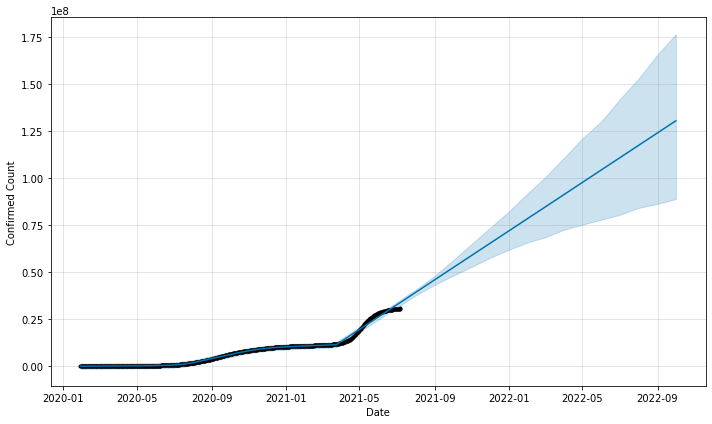

In [77]:
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
fig = plot_plotly(my_model, forecast)
pyo.iplot(fig) 

fig = my_model.plot(forecast,xlabel='Date',ylabel='Confirmed Count')

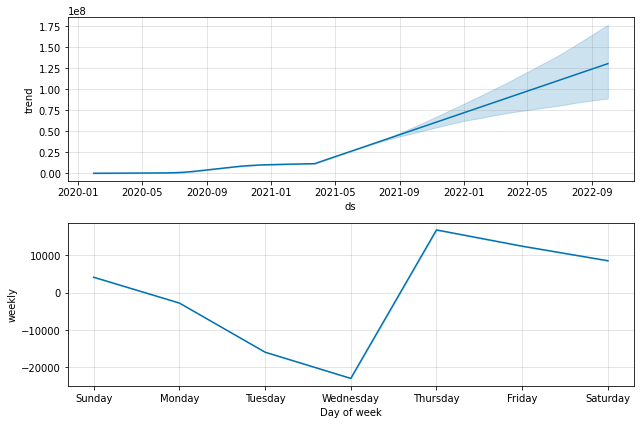

In [78]:
forecast_components=my_model.plot_components(forecast)

 Number of Covid 19 cases  are increasing day by day and trend shows that yet it's peak has not reached as per data - only vaccine and lockdown are feasible approach to tackle this situation. 

In [79]:
fb_death = fb_data[['Date', 'Deaths']]
fb_death = fb_death.rename(columns={'Date': 'ds',
                        'Deaths': 'y'})

m = Prophet()
m.fit(fb_death)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='red'))
fig.add_trace(go.Scatter(x=fb_death['ds'], y=fb_death['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='blue'))
fig.update_layout(
    title='Forecasting of Deaths in INDIA for Next 30 Days')
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
fb_Cured = fb_data[['Date', 'Cured']]
fb_Cured = fb_death.rename(columns={'Date': 'ds',
                        'Cured': 'y'})

m = Prophet()
m.fit(fb_Cured)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                    mode='lines+markers',name='Predicted Cases',marker_color='green'))
fig.add_trace(go.Scatter(x=fb_Cured['ds'], y=fb_Cured['y'],
                    mode='lines+markers',name='Actual Cases',marker_color='yellow'))
fig.update_layout(
    title='Forecasting of Cured in INDIA for Next 30 Days')
fig.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### SARIMAX MODEL

In [81]:
# test size
test_size = 30
train_size= len(df1) - test_size
train = df1[['Confirmed']].iloc[:train_size]
test = df1[['Confirmed']].iloc[train_size:]
# train and test

print(train.shape)
print(test.shape)

(495, 1)
(30, 1)


In [82]:
# exons variables
exons=df1[['Cured','Deaths']]

full_data = df1['Confirmed']

In [83]:
import statsmodels.api as sm
SARIMAX__model = sm.tsa.statespace.SARIMAX(full_data.values,exons=exons,
                                            order=(1,0,1),
                                            seasonal_order=(1,0,1,7),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False,)
SARIMAX__model = SARIMAX__model.fit(maxiter=1000)

days=60
prediction = SARIMAX__model.get_forecast(steps=days)
pred_date = prediction.summary_frame(alpha=0.05).set_index(pd.date_range(start='2021-07-07',periods=days,freq='D'))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [84]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Actual",
     x=df1['Date'], y=df1["Confirmed"]))

fig.add_trace(go.Scatter(
    name="prediction",mode="lines",
     x=pred_date.index, y=pred_date['mean']))

fig.add_trace(go.Scatter(
    name="lowerbound",mode="lines",
        line=dict(width=0),fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',showlegend=False,
     x=pred_date.index, y=pred_date['mean_ci_lower']))

fig.add_trace(go.Scatter(name="upperbound",mode="lines",
        line=dict(width=0),fillcolor='rgba(68, 68, 68, 0.3)',fill='tonexty',showlegend=False,
                         x=pred_date.index, y=pred_date['mean_ci_upper']))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(2021-06-08, 200000, 'Unlock 1.0')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

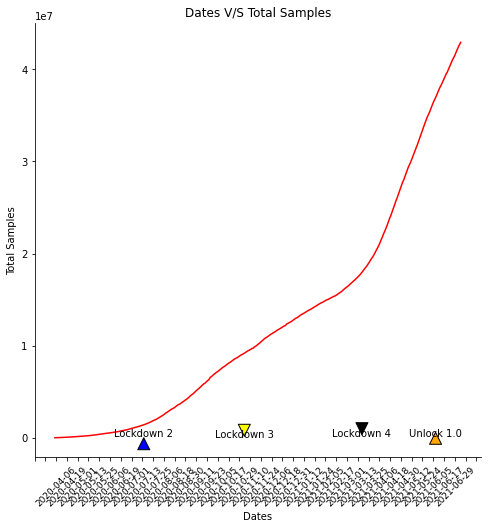

In [91]:
Telangana_test=st_df[(st_df['State']=='Maharashtra')]
plt.figure(figsize=(8,8))
plt.plot(Telangana_test['Date'],Telangana_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-07-15', 21994), xytext=('2020-07-15',150000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-11-04',162970), xytext=('2020-11-04',5000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2021-03-18',337841), xytext=('2021-03-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2021-06-08',607952), xytext=('2021-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 

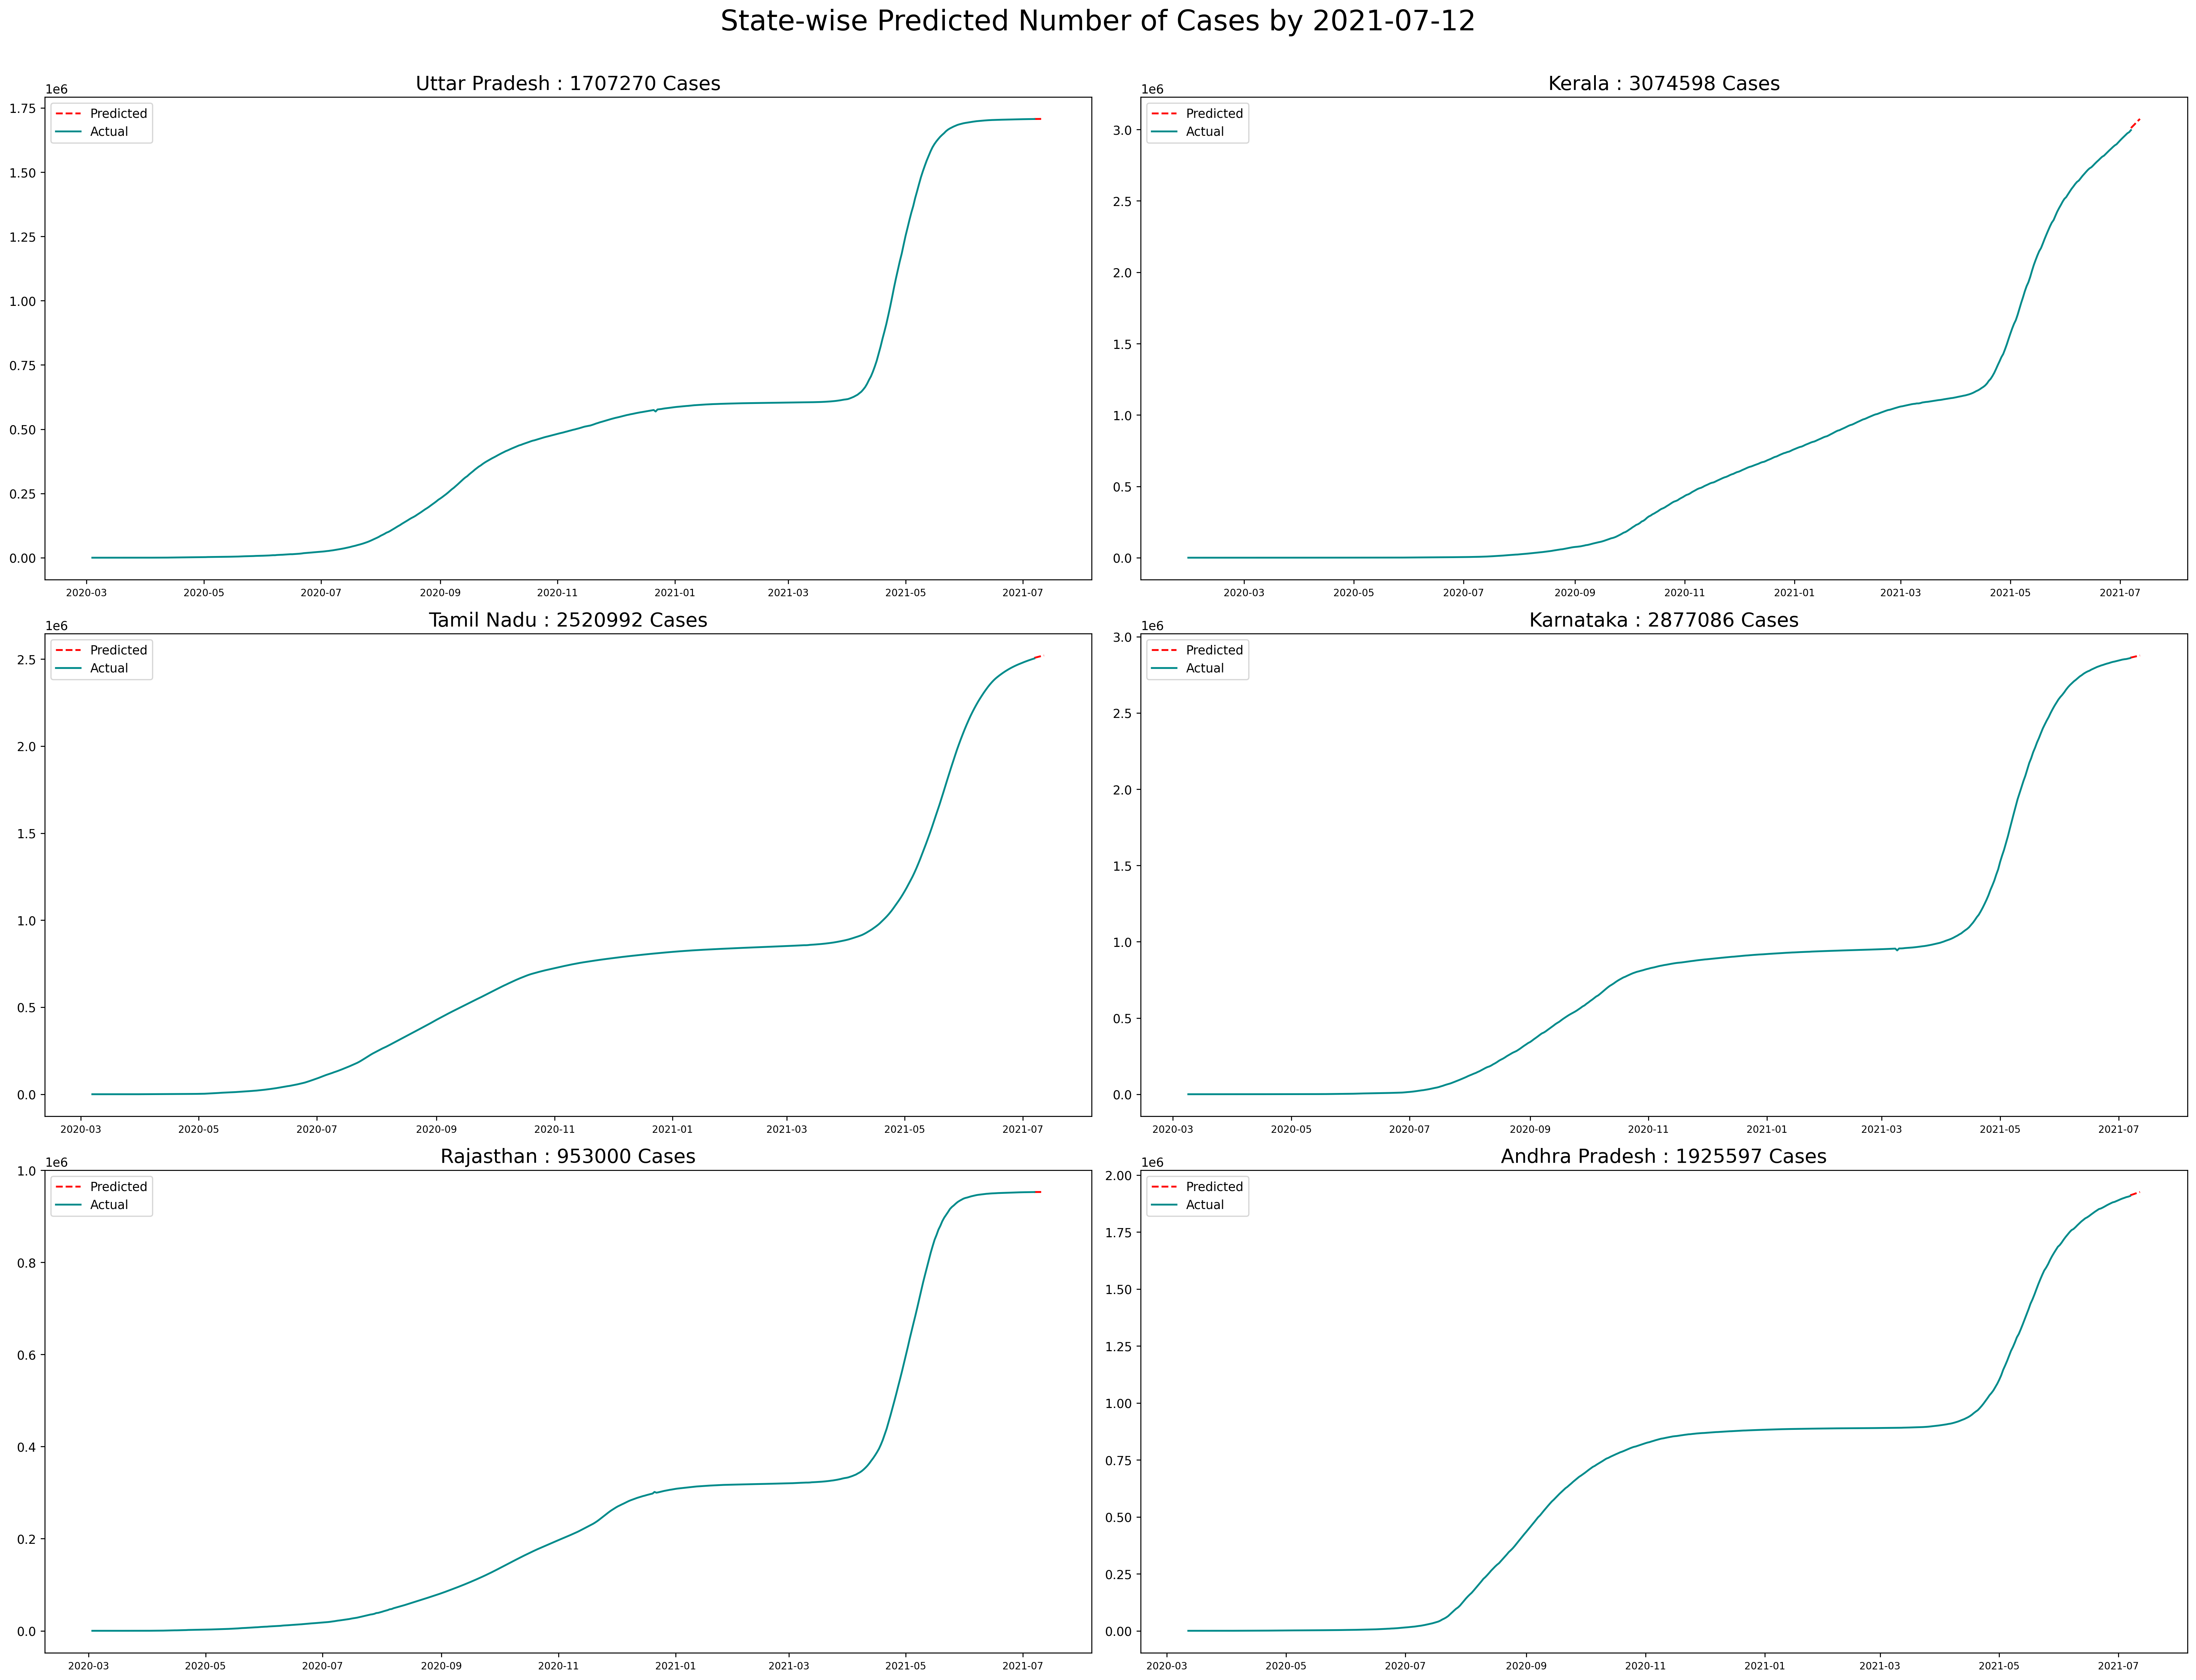

In [94]:
states=['Uttar Pradesh','Kerala', 'Tamil Nadu', 'Karnataka', 'Rajasthan',
        'Andhra Pradesh']
from datetime import datetime,timedelta
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
fig = plt.figure(figsize=(25,20),dpi = 250)
subplotno = 1

for state in states:
    
     
    state_df = df[df['State/UnionTerritory'] == state]
    y = state_df['Confirmed']
    
    arima = ARIMA(y, order=(5, 2, 0))
    arima = arima.fit(trend='c', full_output=True, disp=True)
    forecast = arima.forecast(steps= 6)
    pred = list(forecast[0])

    start_date = state_df['Date'].max()

    prediction_dates = [pd.to_datetime(start_date)]

    for i in range(5):
        
        tempdate = start_date + timedelta(days=1)
        prediction_dates.append(tempdate)
        start_date = tempdate
    
    ax = fig.add_subplot(3,2,subplotno)
    
    plt.title(state + ' : ' + str(int(round(pred[-1],0))) + ' Cases' , fontsize = 16)


    plt.xticks(fontsize = 8)
    
    sns.lineplot(y= pred,x= prediction_dates,linestyle ='dashed',label = 'Predicted',color = 'red')
    sns.lineplot(y=state_df['Confirmed'] , x = state_df['Date'] ,color = 'darkcyan',label = 'Actual')
    plt.legend()
    

    plt.ylabel('')
    plt.xlabel('')

    subplotno +=1

plt.suptitle('State-wise Predicted Number of Cases by '+str(prediction_dates[-1].date()) ,fontsize = 23)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Statepred - ARIMA')

Curve is going upwards so rigrously, the only hope is with vaccination lets check vacination data

## Vaccination detail 

In [ ]:
vc_pro =vc_df.groupby('State')['Total Individuals Vaccinated'].max().reset_index().sort_values(['Total Individuals Vaccinated'],ascending=False)
vc_pro

Highest Population is of                    
Uttar Pradesh	          29305008.0  so lets check its data for vaccination 


In [101]:
up =vc_df[vc_df["State"]=="Uttar Pradesh"] 
fig = px.line(up,x="Updated On",y="Total Individuals Vaccinated",title="UP Vaccinated per day")  
fig.update_xaxes(rangeslider_visible=True) 

In [102]:
fig = px.line(up,x="Updated On",y="Total Sessions Conducted",title="Total Number of sessions are conducted in UP per day")  
fig.update_xaxes(rangeslider_visible=True) 

In [103]:
male = up["Male(Individuals Vaccinated)"].sum() 
female = up["Female(Individuals Vaccinated)"].sum()  
trans = up["Transgender(Individuals Vaccinated)"].sum()
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Male and Female Vaccinated ratio for Covid19--UP")

In [105]:
first = up["First Dose Administered"].sum() 
second = up["Second Dose Administered"].sum() 
px.pie(names=["First Dose","Second dose"],values=[first,second],title ="First and Second dosage ratio for covid in UP")

Production of vaccine is increasing day by day also people are getting vaccinated, Hope curve of number of cases get flatten soon. 
But for this people have to follow lockdown and take precaution as told by government.
